In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error
#warnings
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***
About Dataset\
The data contains 53940 records for training. Short descriptions of the business meaning of each column in the data is as below:\
carat: The carat value of the Diamond\
cut: The cut type of the Diamond, it determines the shine (Ideal' 'Premium' 'Good' 'Very Good' 'Fair')\
color: The color value of the Diamond ('E' 'I' 'J' 'H' 'F' 'G' 'D')\
clarity: The carat type of the Diamond ('SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1')\
depth: The depth value of the Diamond\
table: Flat facet on its surface — the large, flat surface facet that you can see when you look at the diamond from above.\
x: Width of the diamond\
y: Length of the diamond\
z: Height of the diamond\
price: The price of the Diamond in USD.

In [31]:
#load the csv dataset
df=pd.read_csv('/content/diamonds.csv')

In [32]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [33]:
#shape of dataset
df.shape

(53940, 10)

#***EDA(Explotary Data Analysis):-***

In [34]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [35]:
#dataset describe
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [36]:
#dataset the null values
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
x,0
y,0
z,0
price,0


In [37]:
#dataset the dulicated rows
df.duplicated().sum()

146

In [38]:
#drop the duplicates rows
df.drop_duplicates(inplace=True)

In [39]:
# unique value
for i in df.columns:
    print("The unique values in",i,"are: ",df.loc[:,i].nunique())

The unique values in carat are:  273
The unique values in cut are:  5
The unique values in color are:  7
The unique values in clarity are:  8
The unique values in depth are:  184
The unique values in table are:  127
The unique values in x are:  554
The unique values in y are:  552
The unique values in z are:  375
The unique values in price are:  11602


In [40]:
#categorical column list
cat_col=df.select_dtypes(include='object').columns
cat_col

Index(['cut', 'color', 'clarity'], dtype='object')

In [41]:
#numerical column list
num_col=df.select_dtypes(exclude='object').columns
num_col

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [42]:
#check the unique values in cat_col
for i in cat_col:
    print("The unique values in",i,"are: ",df.loc[:,i].unique())

The unique values in cut are:  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
The unique values in color are:  ['E' 'I' 'J' 'H' 'F' 'G' 'D']
The unique values in clarity are:  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


#***Data Visualization:-***

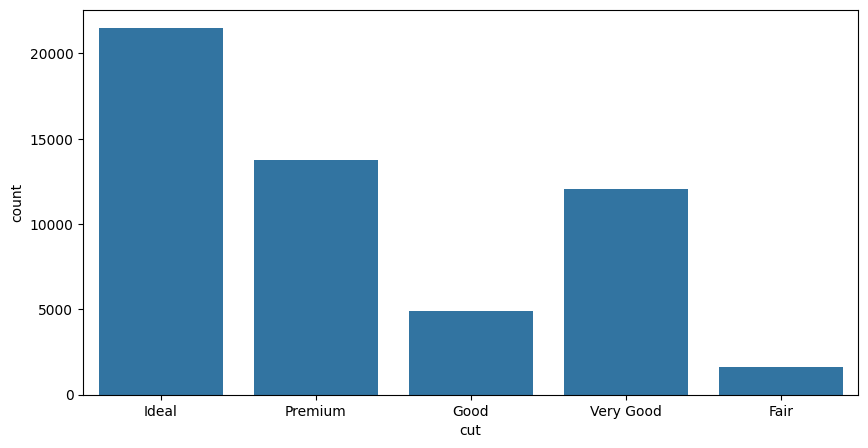

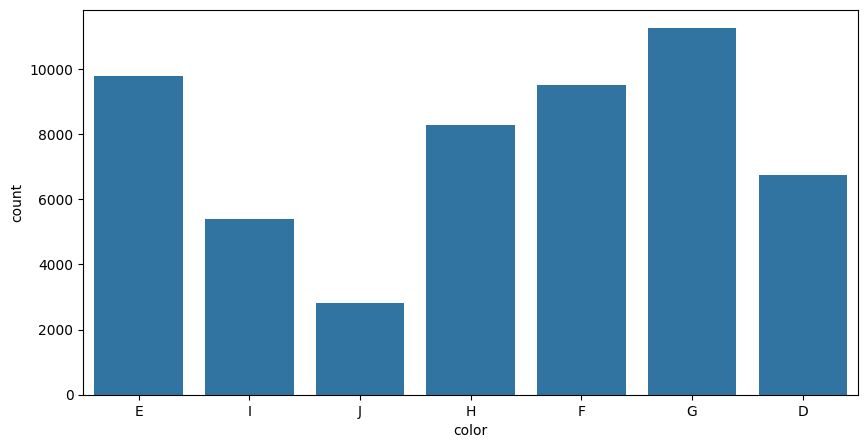

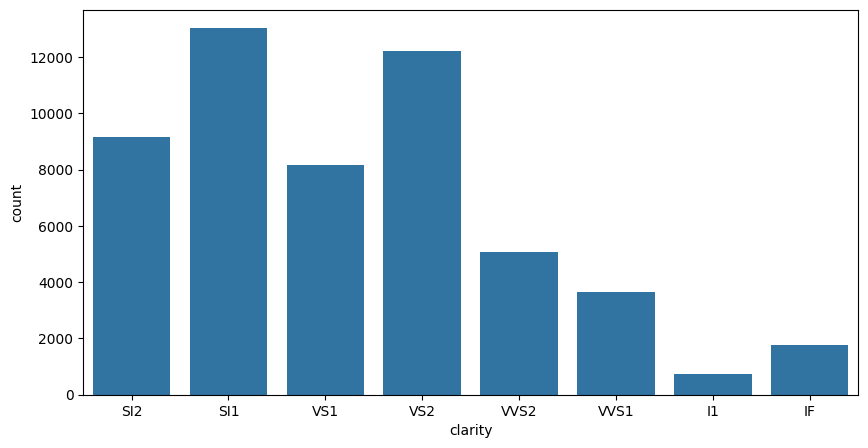

In [43]:
#datset categorical column visualization
for i in cat_col:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,data=df)
    plt.show()

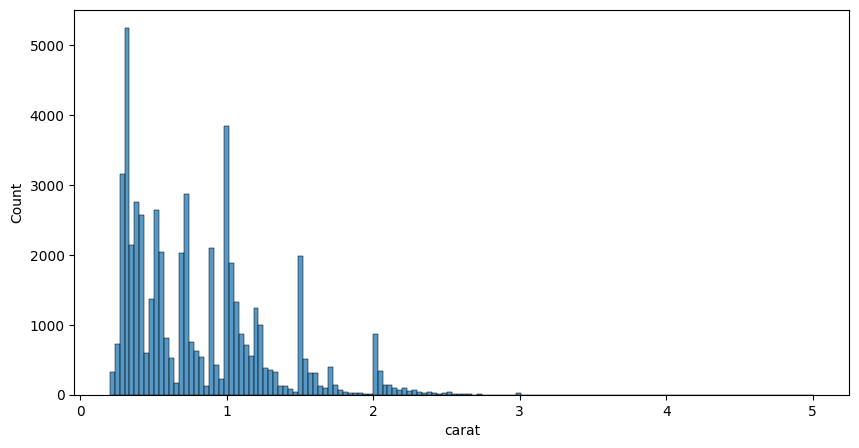

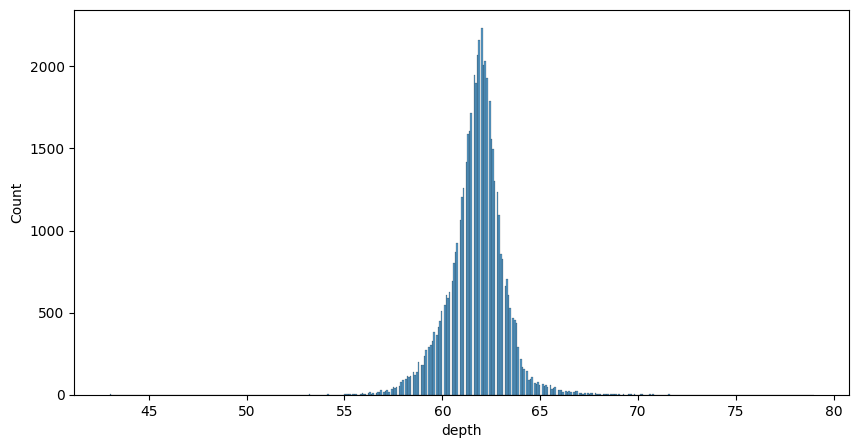

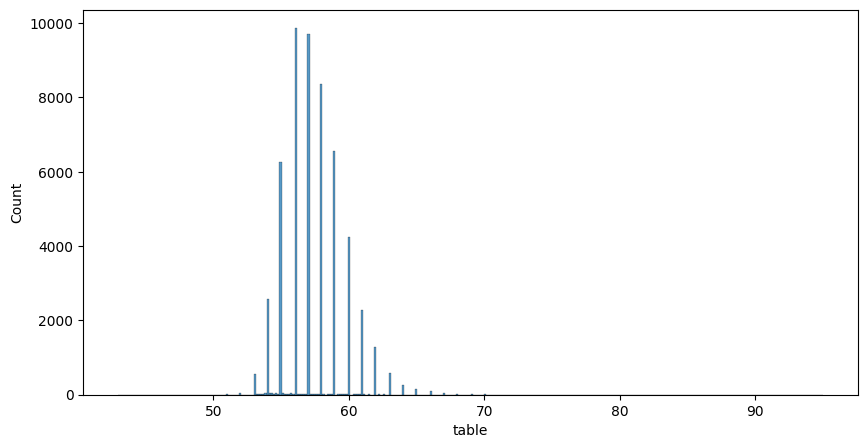

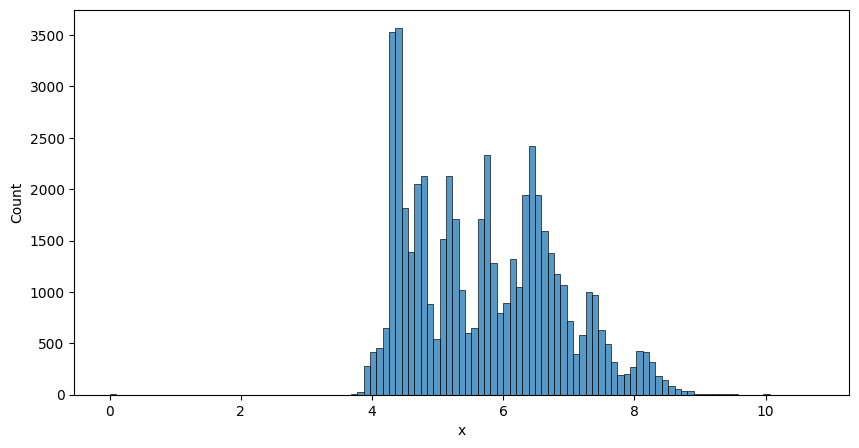

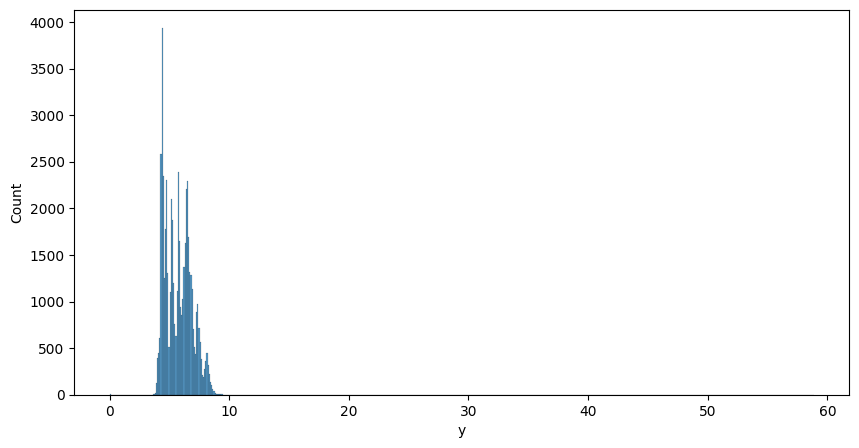

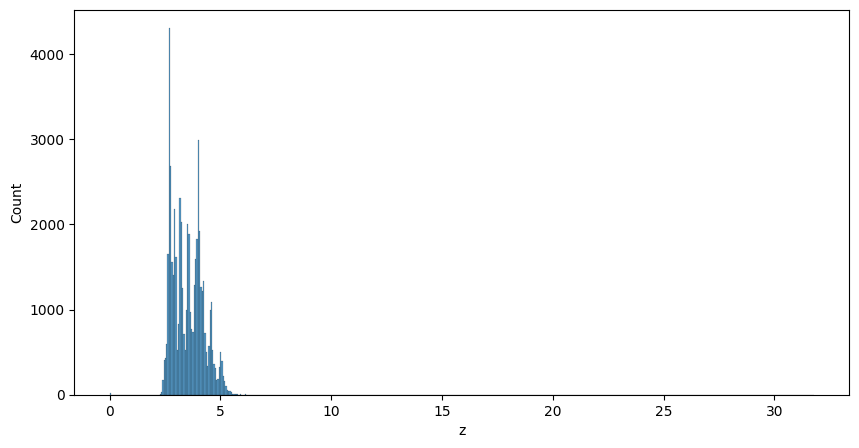

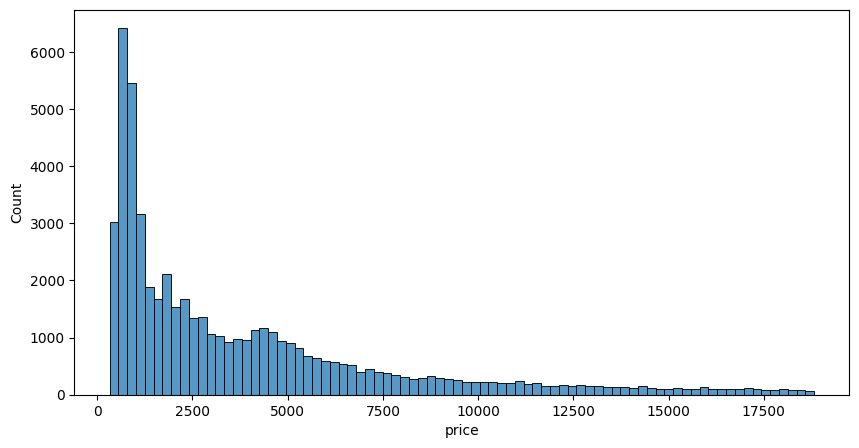

In [44]:
#dataset numerical column visualization
for i in num_col:
    plt.figure(figsize=(10,5))
    sns.histplot(x=i,data=df)
    plt.show()

#***Label encoding:-***

In [45]:
#label encoding then save model
le=LabelEncoder()
for i in cat_col:
    df[i]=le.fit_transform(df[i])
    le=le.fit(df[i])

In [46]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335


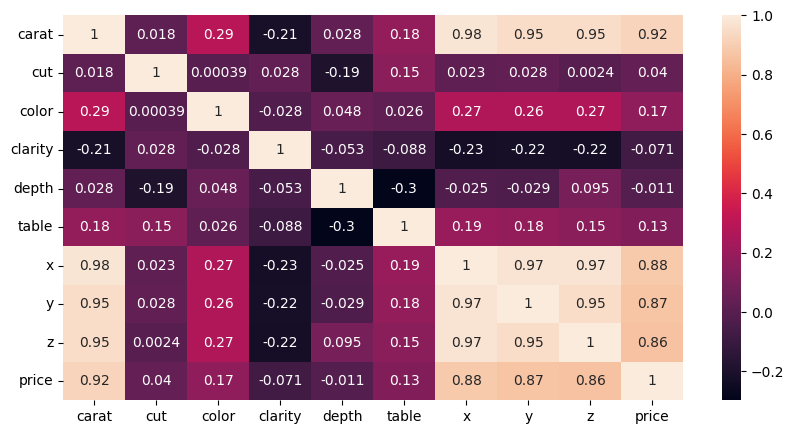

In [62]:
#dataset correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

#***spliting the dataset:-***

In [47]:
X=df.drop('price',axis=1)
y=df['price']

In [48]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [49]:
#spliting the dataset in to train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#***choose Best model:-***

In [50]:
# Models to evaluate
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'KNeighborsRegressor': KNeighborsRegressor()
}

In [51]:
# Evaluate models
best_model = None
best_mse = float('inf')

In [52]:
#Choose best model on basics of evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: MSE = {mse:.2f}, R2 Score = {r2:.2f}")

    if mse < best_mse:
        best_mse = mse
        best_model = model

LinearRegression: MSE = 1722518.02, R2 Score = 0.89
RandomForestRegressor: MSE = 269758.38, R2 Score = 0.98
DecisionTreeRegressor: MSE = 506797.08, R2 Score = 0.97
KNeighborsRegressor: MSE = 800802.54, R2 Score = 0.95


#***Building Model:-***

In [57]:
#build the model
Rfr=RandomForestRegressor()
Rfr.fit(X_train,y_train)

RandomForestRegressor()

In [59]:
Rfr.fit(X_train, y_train)
y_pred = Rfr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"{Rfr}: MSE = {mse:.2f}, R2 Score = {r2:.2f}")

RandomForestRegressor(): MSE = 266754.33, R2 Score = 0.98


#***Save the model:-***

In [60]:
#save model and encoding model using joblib
import joblib
joblib.dump(Rfr,'model.pkl')
joblib.dump(le,'label_encoder.pkl')

['label_encoder.pkl']